# Recommendation System using Matrix Factorization in Python
###### Prabin Lamsal


### First we import the libraries necessary to us

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Then we import the datasets
  ### Here ratings stores the dataset of the ratings and movies stores the dataset for  movies.

In [4]:
ratings="https://github.com/couturierc/tutorials/raw/master/recommender_system/data/ratings.csv"
movies="https://github.com/couturierc/tutorials/raw/master/recommender_system/data/movies.csv"


# If data stored locally
# ratings="./data/ratings.csv"
# movies="./data/movies.csv"

df_ratings = pd.read_csv(ratings, sep=',')                     # read_csv reads the given link i.e ratings and the separation used is a comma ','
df_ratings.columns = ['userId', 'itemId', 'rating', 'timestamp']
df_movies = pd.read_csv(movies, sep=',')                       # read_csv reads the given link i.e movies and the separation used is a comma ','
df_movies.columns = ['itemId', 'title', 'genres']

In [5]:
df_movies.head(10)           #head() gives the top 5 data. But by entering 10 as a parameter, we get top 10 datasets.

,itemId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
df_ratings.head(10)      #head() gives the top 5 data. But by entering 10 as a parameter, we get top 10 datasets.

,userId,itemId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [7]:
df_movies.describe()

,itemId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [8]:
df_ratings.describe()

,userId,itemId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


### We can represent the given datasets in the form of histograms too. Here we are using matplotlib library to do so.
### Using the histograph below, we can visualse what ratings do most of the users give. 

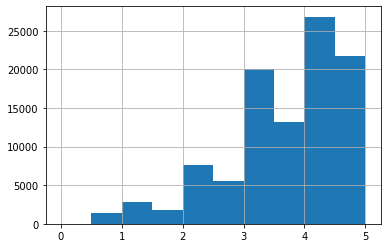

In [9]:
#df_ratings.rating.hist(bins=8)    this is also correct as it says that the no. of class intervals i.e bins is 8.
df_ratings.rating.hist(bins=np.arange(0,5.5,0.5))  #this function takes the starting value, the ending value and the class length as the parameters and returns the number of intervals so formed.

### Using the histogram below, we can visualise the timeframe where the ratings were given by the users. 

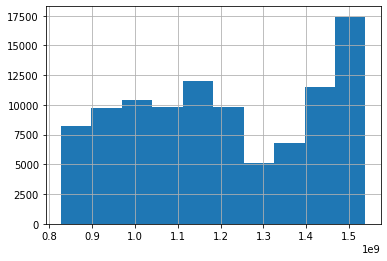

In [10]:
df_ratings.timestamp.hist()

# Colaborative Filtering
### The first step of a colaborative filtering is to build a item-user matrix.This is also called a pivot matrix.
### We are using usersID for the rows of the matrix and ItemId for the column of the matrix. This matrix is a very sparse matrix.

In [11]:
##### FILL HERE (1 line) ######
df_user_item = df_ratings.pivot(index='userId', columns='itemId',values='rating')

# Sort index/rows (userId's) and columns (itemId's)

df_user_item.sort_index(axis=0, inplace=True)
df_user_item.sort_index(axis=1, inplace=True)
df_user_item.head()

itemId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_user_item.describe()

itemId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
count,215.000000,110.000000,52.000000,7.000000,49.000000,102.000000,54.000000,8.000000,16.000000,132.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,3.920930,3.431818,3.259615,2.357143,3.071429,3.946078,3.185185,2.875000,3.125000,3.496212,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
std,0.834859,0.881713,1.054823,0.852168,0.907148,0.817224,0.977561,1.125992,0.974679,0.859381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.500000,0.500000,0.500000,1.000000,0.500000,1.000000,1.000000,1.000000,1.500000,0.500000,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
25%,3.500000,3.000000,3.000000,1.750000,3.000000,3.125000,3.000000,2.750000,2.875000,3.000000,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
50%,4.000000,3.500000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.500000,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
75%,4.500000,4.000000,4.000000,3.000000,3.500000,4.500000,4.000000,3.000000,3.250000,4.000000,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
max,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0


# Approximating SVD with Stochastic Gradient Descent

### Singular Value Decomposition decomposes a matrix $R$ into the best lower rank (i.e. smaller/simpler) approximation of the original matrix $R$. Mathematically, it decomposes R into a two unitary matrices and a diagonal matrix:

$$\begin{equation}
R = U\Sigma V^{T}
\end{equation}$$
where:

R is users's ratings matrix, 

$U$ is the user "features" matrix, it represents how much users "like" each feature,

$\Sigma$ is the diagonal matrix of singular values (essentially weights),

$V^{T}$ is the movie "features" matrix,

it represents how relevant each feature is to each movie,with $U$ and $V^{T}$ orthogonal.

### But SVD is not possible for a sparse matrix. Putting 0 or the mean in the blank spaces will make it dense.But that approach is not feasible.Hence, we use gradient descent algorithm to do so.


We inject $\Sigma$ into U and V, and try to find P and q such that $\widehat{R} = P Q^{T}$ is close to $R$ for the item-user pairs already rated.

A first function to simplify the entries (userId/itemId) : we map the set of

In [13]:
def encode_ids(data):
    '''Takes a rating dataframe and return: 
    - a simplified rating dataframe with ids in range(nb unique id) for users and movies
    - 2 mapping disctionaries
    
    '''

    data_encoded = data.copy()
    
    users = pd.DataFrame(data_encoded.userId.unique(),columns=['userId'])  # df of all unique users
    dict_users = users.to_dict()    
    inv_dict_users = {v: k for k, v in dict_users['userId'].items()}

    items = pd.DataFrame(data_encoded.itemId.unique(),columns=['itemId']) # df of all unique items
    dict_items = items.to_dict()    
    inv_dict_items = {v: k for k, v in dict_items['itemId'].items()}

    data_encoded.userId = data_encoded.userId.map(inv_dict_users)
    data_encoded.itemId = data_encoded.itemId.map(inv_dict_items)

    return data_encoded, dict_users, dict_items

In [14]:
# Adapted from http://nicolas-hug.com/blog/matrix_facto_4
def SGD(data,           # dataframe containing 1 user|item|rating per row
        n_factors = 10, # number of factors
        alpha = .01,    # number of factors
        n_epochs = 1,   # number of iteration of the SGD procedure
       ):
    '''Learn the vectors P and Q (ie all the weights p_u and q_i) with SGD.
    '''

    # Encoding userId's and itemId's in data
    data, dict_users, dict_items = encode_ids(data)
    
    ##### FILL HERE (2 lines) ######
    n_users = data.userId.nunique()  # number of unique users
    n_items = data.itemId.nunique() # number of unique items
    ################################
    
    # Randomly initialize the user and item factors.
    p = np.random.normal(0, .1, (n_users, n_factors))
    q = np.random.normal(0, .1, (n_items, n_factors))

    # Optimization procedure
    for epoch in range(n_epochs):
        print ('epoch: ', epoch)
        # Loop over the rows in data
        for index in range(data.shape[0]):
            row = data.iloc[[index]]
            u = int(row.userId)      # current userId = position in the p vector (thanks to the encoding)
            i = int(row.itemId)      # current itemId = position in the q vector
            r_ui = float(row.rating) # rating associated to the couple (user u , item i)
            
            ##### FILL HERE (1 line) ######
            err = r_ui -np.dot(p[u],q[i].transpose())    # difference between the predicted rating (p_u . q_i) and the known ratings r_ui
            ################################
            
            # Update vectors p_u and q_i
            ##### FILL HERE (2 lines) ######
            p_old=p[u]
            p[u] = p[u]+alpha*err*q[i]  # cf. update rule above 
            q[i] = q[i]+alpha*err*p_old
            ################################
            
    return p, q
    
    
def estimate(u, i, p, q):
    '''Estimate rating of user u for item i.'''
    ##### FILL HERE (1 line) ######
    return np.dot(p[u],q[i].transpose())            #scalar product of p[u] and q[i] /!\ dimensions
    ################################

In [15]:
p, q = SGD(df_ratings)


epoch:  0


### Get estimates for all user-item pairs.

In [16]:
df_user_items_filled=pd.DataFrame(np.dot(p,q.transpose()))
df_user_items_filled.hea
d()

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.001628,0.001845,-0.014152,-0.052639,-0.049054,-0.012066,0.012364,-0.102761,-0.024958,0.062248,...,-0.005439,-0.048450,-0.069012,-0.013772,0.009067,-0.013741,-0.007650,-0.069974,-0.010336,0.043915
1,0.048564,0.012607,0.006145,0.024846,-0.006356,-0.000347,0.012599,-0.076438,0.011443,0.028126,...,-0.025066,0.035205,-0.030851,-0.024669,-0.032316,-0.018864,0.026598,-0.017987,-0.007627,0.044177
2,0.001314,-0.015575,-0.023192,0.039077,-0.039976,-0.048085,0.015317,0.017848,0.004105,-0.088955,...,0.011178,0.029074,0.018589,-0.036080,-0.002667,-0.040635,0.019325,0.051383,-0.029892,-0.030442
3,-0.012451,-0.038635,-0.041385,0.083884,0.073873,0.038541,0.010641,0.057558,-0.000394,-0.028991,...,-0.038606,0.012655,-0.080987,-0.031699,0.013715,0.010571,0.014159,0.019633,-0.039895,0.064658
4,-0.017821,-0.009921,-0.006723,-0.005512,-0.023072,0.005982,0.034194,-0.024351,-0.019423,0.009780,...,-0.037668,0.028997,0.017349,-0.009994,-0.051540,0.016438,-0.020897,0.006414,-0.007302,-0.037679


In [17]:
df_ratings_encoded,dict_users,dict_items=encode_ids(df_ratings)


In [18]:
df_user_items_filled.rename(columns=(dict_items['itemId']), inplace=True)
df_user_items_filled.rename(index=(dict_users['userId']),inplace=True)

#for sorting the rows and the columns
df_user_items_filled.sort_index(axis=0,inplace=True)
df_user_items_filled.sort_index(axis=1,inplace=True)
df_user_items_filled.head()



,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
1,0.001628,-0.037468,0.001845,-0.073717,-0.006569,-0.014152,-0.047604,0.015295,0.058234,-0.125410,...,-0.012610,0.015157,-0.034709,0.031002,-0.028800,-0.000977,0.031529,0.008645,0.042175,0.025274
2,0.048564,0.031306,0.012607,-0.001326,0.108679,0.006145,0.020893,-0.037483,-0.041259,0.066962,...,0.016118,0.019785,-0.046043,0.023366,0.014154,0.002726,-0.018910,0.030478,0.037862,-0.001842
3,0.001314,0.049081,-0.015575,0.068092,-0.036713,-0.023192,0.033090,0.004560,0.002938,0.076973,...,-0.043183,0.037152,0.041008,-0.063900,-0.026386,0.019331,0.002163,-0.044369,-0.077217,-0.006647
4,-0.012451,0.061074,-0.038635,0.019220,-0.040533,-0.041385,-0.012834,-0.012103,-0.093558,-0.004560,...,-0.067910,0.060442,-0.079761,0.003078,-0.003870,0.002442,0.005784,-0.041299,0.048581,0.049809
5,-0.017821,-0.024576,-0.009921,-0.016158,0.049883,-0.006723,0.020210,-0.033098,-0.028071,0.032145,...,0.010283,-0.002815,-0.022167,0.006417,0.029008,-0.007404,-0.014779,-0.000873,0.020812,-0.014858


In [19]:
df_user_items_filled.loc[1][:10]

1     0.001628
2    -0.037468
3     0.001845
4    -0.073717
5    -0.006569
6    -0.014152
7    -0.047604
8     0.015295
9     0.058234
10   -0.125410
Name: 1, dtype: float64

# Giving recommendations to the user
### Here are 10 movie recommendations for user no. N

In [23]:
N=2

In [28]:
list(df_user_items_filled.loc[N])

[0.048564273462092855,
 0.03130574439547429,
 0.012607456845621475,
 -0.001325776516192711,
 0.10867860612271081,
 0.0061452356233401536,
 0.02089325182511543,
 -0.03748344181220268,
 -0.041258647489436154,
 0.06696231811505293,
 -0.09279809256882895,
 -0.019248250651794165,
 0.0593808361413715,
 -0.025544662788975134,
 0.047210309626584464,
 -0.0013835915723163974,
 0.051837319756704234,
 0.07455226124244935,
 0.04384621383507613,
 0.0907488209375293,
 -0.019822128030746,
 0.006845449323104496,
 0.044398385874724486,
 0.020532889861382134,
 0.026996982676202493,
 -0.010957615357317964,
 -0.021211229470275816,
 -0.04881067895540746,
 -0.015605489085074909,
 0.032182045088648005,
 0.07526127606624526,
 -0.0964817394213915,
 0.047392791333235436,
 0.007896984556819118,
 0.011624801606558112,
 -0.030735470801844342,
 0.00475699772089041,
 0.01436535261001344,
 -0.011985180526053985,
 -0.025167812095766327,
 0.0681783638224747,
 0.07020987658429573,
 -0.036954192223909,
 0.0248460334382822

In [27]:
recommendations=list((df_user_items_filled.loc[N]).sort_values(ascending=False)[:100].index)
recommendations

[588,
 364,
 86142,
 4500,
 82202,
 55687,
 908,
 7335,
 107780,
 89582,
 2331,
 158254,
 318,
 480,
 5012,
 4197,
 4825,
 5,
 933,
 428,
 89072,
 616,
 7124,
 474,
 47793,
 4154,
 1858,
 1679,
 5461,
 55190,
 3219,
 146730,
 477,
 118290,
 1449,
 26717,
 415,
 32649,
 133867,
 90057,
 4723,
 175781,
 919,
 166203,
 42018,
 6527,
 71550,
 163056,
 58492,
 5508,
 556,
 1212,
 4451,
 136305,
 6615,
 2066,
 120827,
 94867,
 44225,
 7184,
 48032,
 589,
 594,
 90524,
 114028,
 3824,
 1431,
 139717,
 58351,
 5425,
 154358,
 6169,
 8482,
 3939,
 1948,
 4084,
 595,
 802,
 45732,
 6341,
 20,
 45440,
 6329,
 2190,
 75416,
 4831,
 6780,
 6295,
 112512,
 26554,
 2418,
 3008,
 661,
 573,
 1120,
 2339,
 1895,
 40723,
 96530,
 1582]

In [25]:
df_movies[df_movies.itemId.isin(recommendations)]

,itemId,title,genres
322,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
690,908,North by Northwest (1959),Action|Adventure|Mystery|Romance|Thriller
3325,4500,Drowning by Numbers (1988),Comedy|Drama
4896,7335,Pickup on South Street (1953),Film-Noir
6606,55687,My Kid Could Paint That (2007),Documentary
7479,82202,"Tourist, The (2010)",Drama|Thriller
7579,86142,13 Assassins (Jûsan-nin no shikaku) (2010),Action
7690,89582,Cold Fish (Tsumetai nettaigyo) (2010),Drama|Thriller
8335,107780,Cats (1998),Musical
